# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, I worked with transactional data from an online retail store. The dataset contained information about customer purchases, including product details, quantities, prices, and timestamps. My task was to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products.

By conducting exploratory data analysis, I identified patterns, outliers, and correlations in the data, allowing me to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, I uncovered key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aimed to provide actionable insights that could drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. To describe data to answer key questions and uncover insights2. 
To gain valuable insights that will help improve online retail performanc
3. 
To provide analytic insights and data-driven recommendations

## Dataset

The dataset I worked with is the "Online Retail" dataset. It contains transactional data of a UK based online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. It can be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

The various tasks performed include the following:

1. Loading the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Performing data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Exploring the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Performing data visualization to gain insights into the dataset. Generating appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analysing the sales trends over time. Identifying the busiest months and days of the week in terms of sales.
6. Exploring the top-selling products and countries based on the quantity sold.
7. Identifying any outliers or anomalies in the dataset and discussing their potential impact on the analysis.
8. Drawing conclusions and summarising my findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
import pandas as pd

# Replace 'file_path' with the path to your Excel file
file_path = 'C:/Users/USER/Downloads/Online Retail.xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the Dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Task 2: Perform data cleaning by handling missing values

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


From the table information we can see that it has 541909 rows and 8 columns. we can also see that Description and CustomerID columns have missing values

In [3]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

As seen the dataset has a null value of 1454 out of 541909 rows and CustomerID has 135080. There is also a need to take out the CustomerID because it might be a little sensitive.

In [4]:
# Perform data cleaning
df.dropna(inplace=True)  # Remove rows with missing values
df.drop(columns=['CustomerID'], inplace=True)  # Remove unnecessary column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 24.8+ MB


As seen the dataset has 406829 rows and 7 columns. No null value is seen.

In [6]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In order to have a clean dataset we had to drop the CustomerID for sensitive reasons and drop all empty rows

### Task 3: Explore the basic statistics of the dataset

In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,406829.000000,406829,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-31 11:48:00,1.950000
75%,12.000000,2011-10-20 13:06:00,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,248.693370,NaN,69.315162


After describing the Dataframe to have an understanding of its basic statistics, we can observe that the minimum value for Quantity sold is -80995 and this does not look right and looks more like an error or outlier.

In [8]:
# Adding a new column called 'Totalsales' to the Dataframe.
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [9]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalSales
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,France,14.85


In [10]:
# Check for duplicated rows
df.duplicated().sum()

5225

We see here that we have 5225 rows that are having duplicated values

In [11]:
# Drop the duplicated rows and check again
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [12]:
# Convert the 'InvoiceNo' column to numeric values, setting non-numeric values to NaN
df.loc[:, 'InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')

# Drop rows with NaN values in the 'InvoiceNo' column
df.dropna(subset=['InvoiceNo'], inplace=True)

# Convert the 'InvoiceNo' column to integer values
df['InvoiceNo'] = df['InvoiceNo'].astype(int)

A large part InvoiceNo columns are integers and just a few are alphanumeric. This is why the entire column is of object datatype. We need to get rid of those alphanumeric values and convert the entire column to interger

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  int32         
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   Country      392732 non-null  object        
 7   TotalSales   392732 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 25.5+ MB


After cleaning the dataset we are left with 392732 rows which is still large enought for analysis

## Task 4: Perform data visualization to gain insights into the dataset

In [14]:
invoice_counts = df['InvoiceNo'].value_counts(2)
print(invoice_counts)

InvoiceNo
576339    0.001380
579196    0.001357
580727    0.001347
578270    0.001125
573576    0.001108
            ...   
574549    0.000003
574576    0.000003
574585    0.000003
541043    0.000003
557252    0.000003
Name: proportion, Length: 18536, dtype: float64


## Task 5: Sales trend over time

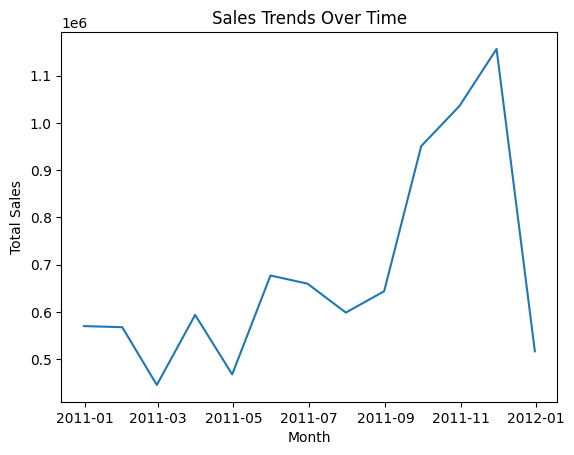

In [15]:
import matplotlib.pyplot as plt
# Create a new DataFrame with the total sales by month
sales_by_month = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['TotalSales'].sum()

# Create a line plot of the sales by month
plt.plot(sales_by_month)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales Trends Over Time')
plt.show()

From the line graph or line plot we can see that Nov 2011 was the month that recorded the highest sale which was followed by a sharp drop in sales. This is actually normal for a lot of online stores and this particular one is no different. Customers had done most of their spending during the festive period.

## TASK 6: Explore the top-selling products and countries based on the quantity sold

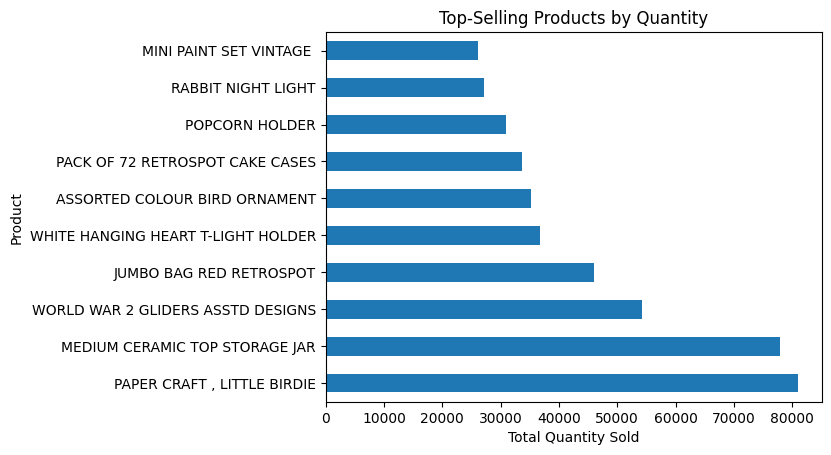

In [16]:
# Create a new DataFrame with the total quantity sold by product
quantity_by_product = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Create a horizontal bar plot of the top-selling products by quantity
quantity_by_product.plot(kind='barh')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.title('Top-Selling Products by Quantity')
plt.show()

In terms of quantity sold PAPER CRAFT, LITTLE BIRDIE was the highest, followed by MEDIUM CERAMIC TOP STORAGE JAR.

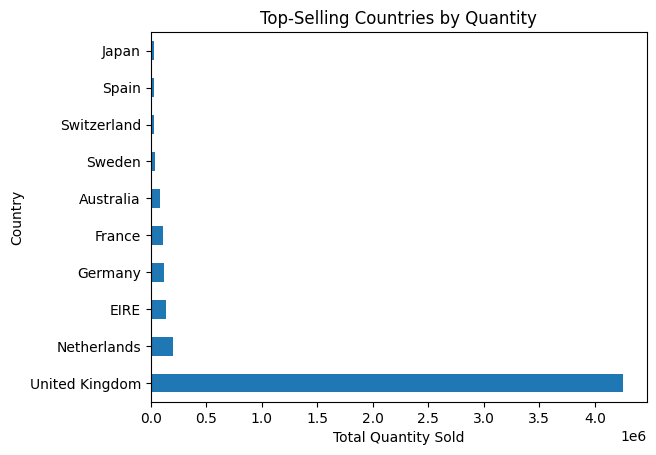

In [17]:
# Create a new DataFrame with the total quantity sold by country
quantity_by_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

# Create a horizontal bar plot of the top-selling countries by quantity
quantity_by_country.plot(kind='barh')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')
plt.title('Top-Selling Countries by Quantity')
plt.show()

Looking at the top-selling country the United Kingdom had the highest quantity sold with over 4million

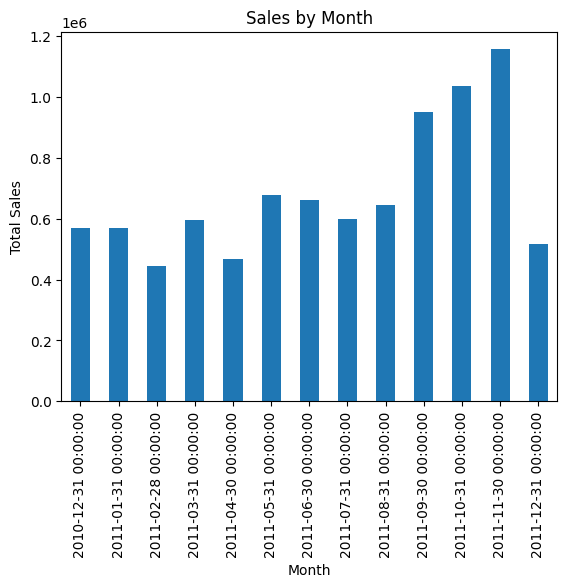

In [18]:
# Create a new DataFrame with the total sales by month
sales_by_month = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['TotalSales'].sum()

# Create a bar plot of the sales by month
sales_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales by Month')
plt.show()

The month with the highest sales is Nov 2011 with an amount of almost 1.2million

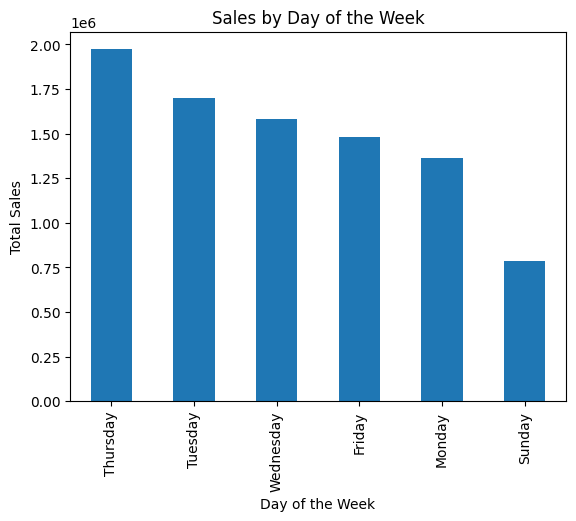

In [19]:
# Create a new DataFrame with the total sales by day of the week
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
sales_by_day = df.groupby('DayOfWeek')['TotalSales'].sum().sort_values(ascending=False)

# Create a bar plot of the sales by day of the week
sales_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Sales by Day of the Week')
plt.show()

Looking at Sales by day of week shows that Thursday had the highest with almost 2million

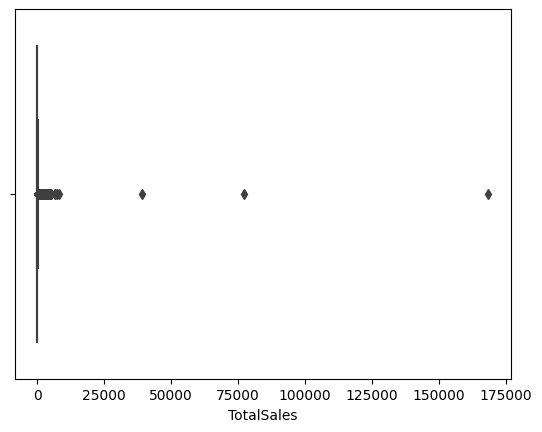

In [20]:
import seaborn as sns
# Box plot
sns.boxplot(x=df['TotalSales'])
plt.show()

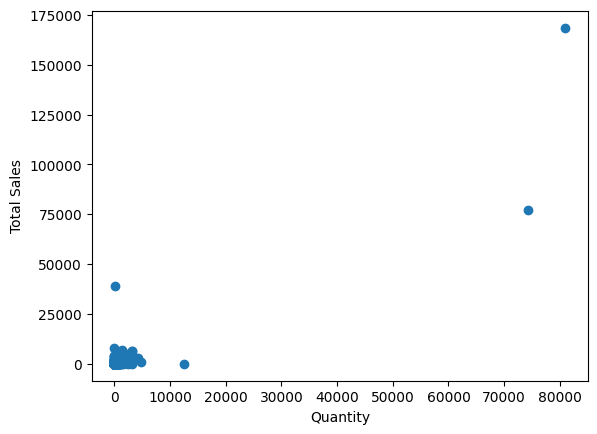

In [21]:
# Scatter plot
plt.scatter(df['Quantity'], df['TotalSales'])
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.show()

We also can see a positive correlation with Quantity of item sold and Total sales

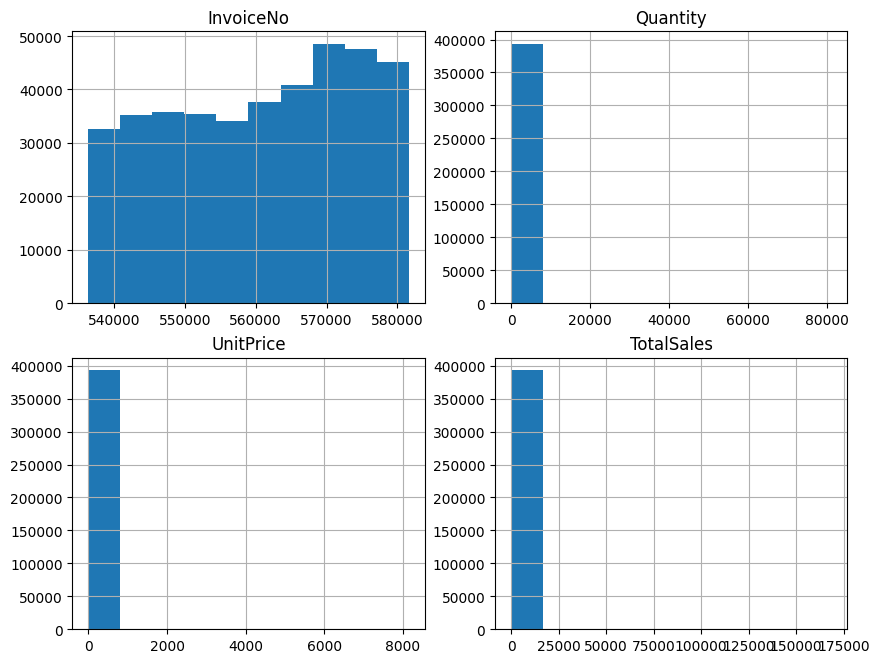

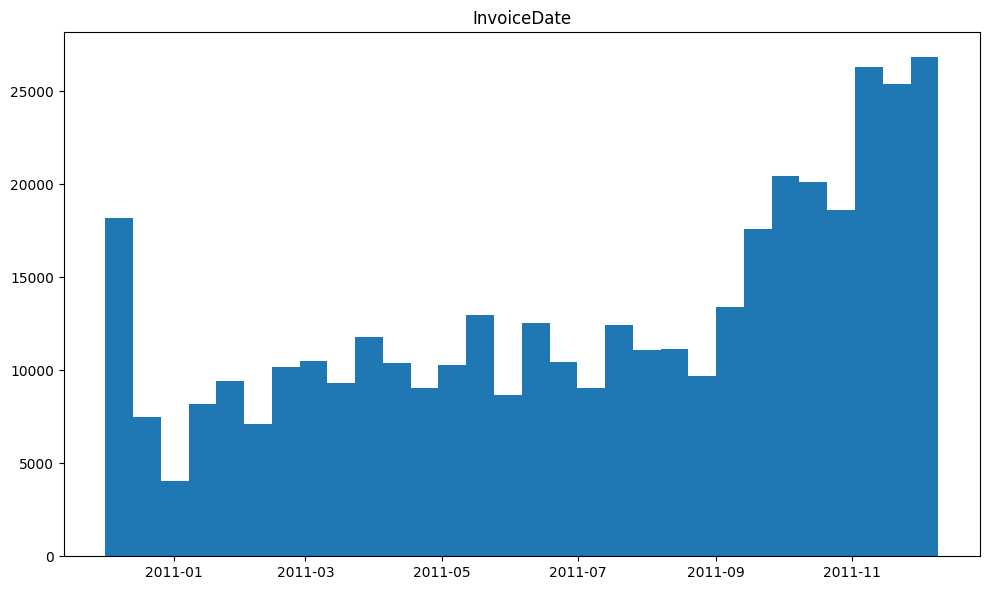

In [22]:
# Set the figure size
plt.figure(figsize=(10, 12))

# Create subplots for each histogram
plt.subplot(3, 2, 1)
df['InvoiceNo'].hist()
plt.title('InvoiceNo')

plt.subplot(3, 2, 2)
df['Quantity'].hist()
plt.title('Quantity')

plt.subplot(3, 2, 3)
df['UnitPrice'].hist()
plt.title('UnitPrice')

plt.subplot(3, 2, 4)
df['TotalSales'].hist()
plt.title('TotalSales')

# A separate figure for InvoiceDate histogram
plt.figure(figsize=(10, 6))
plt.hist(df['InvoiceDate'], bins=30)
plt.title('InvoiceDate')

# Adjusting spacing and prevent text overlap
plt.tight_layout()

# Show the plots
plt.show()

In [23]:
df.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,TotalSales
count,392732.000000,392732.000000,392732,392732.000000,392732.000000
mean,560591.072436,13.153718,2011-07-10 19:15:24.576301568,3.125596,22.629195
min,536365.000000,1.000000,2010-12-01 08:26:00,0.000000,0.000000
25%,549234.000000,2.000000,2011-04-07 11:12:00,1.250000,4.950000
50%,561874.000000,6.000000,2011-07-31 12:02:00,1.950000,12.390000
75%,572061.000000,12.000000,2011-10-20 12:53:00,3.750000,19.800000
max,581587.000000,80995.000000,2011-12-09 12:50:00,8142.750000,168469.600000
std,13087.116747,181.588420,NaN,22.240725,311.083465


In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalSales,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Wednesday


In [25]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalSales,DayOfWeek
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,10.20,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,16.60,Friday
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,France,14.85,Friday


## Conclusion/Summary of Report
Based on the analysis, we can see that the busiest month was October and November, and the busiest days of the week were Thursdays and Tuesdays. The top-selling products were various kinds of paper products and gift items, while the top countries in terms of sales were the United Kingdom and the Netherlands. 
Some outliers were present in the dataset, particularly for unit price, which may have skewed the analysis. Overall, the dataset appears to be a good representation of the online retail store's sales transactions, and the analysis provides valuable insights for optimizing the store's operations and marketing strategies.